## 🖇️David Labett - Kunskapskontroll

---

##### 📦Importera Bibliotek för EDA:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

##### 📂Läs in dataset: *`Students_Social_Media_Addiction.csv`*

In [4]:
df = pd.read_csv("./Students_Social_Media_Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


#### 📑 Vidare skaffar vi oss en överblick: 


In [4]:
# Antal rader/kolumner
df.shape

(705, 13)

In [273]:
# Datatyper och null-värden
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [274]:
# Kompletterande .describe() för kategoriska kolumner
df.describe(include="object")

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
count,705,705,705,705,705,705
unique,2,3,110,12,2,3
top,Female,Undergraduate,India,Instagram,Yes,Single
freq,353,353,53,249,453,384


In [275]:
# En kort kontroll för saknade värden:
if df.isnull().sum().any():
    print("Missing values found:")
    print(df.isnull().sum())
else:
    print("No missing values found.")

No missing values found.


In [276]:
# Antal unika värden i varje kolumn med datatyp 'object':
df.select_dtypes(include=['object']).nunique()

Gender                            2
Academic_Level                    3
Country                         110
Most_Used_Platform               12
Affects_Academic_Performance      2
Relationship_Status               3
dtype: int64

---

### ✂️ Bearbetning av datan inför EDA

In [310]:
# Uppdelning av numeriska och kategoriska kolumner:
numeric_columns = df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
categorical_columns = df[['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']]

print("Numerical columns:", numeric_columns.head(3))
print("Categorical columns:", categorical_columns.head(3))

Numerical columns:    Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Mental_Health_Score  \
0   19                    5.2                    6.5                    6   
1   22                    2.1                    7.5                    8   
2   20                    6.0                    5.0                    5   

   Conflicts_Over_Social_Media  Addicted_Score  
0                            3               8  
1                            0               3  
2                            4               9  
Categorical columns:    Gender Academic_Level     Country Most_Used_Platform  \
0  Female  Undergraduate  Bangladesh          Instagram   
1    Male       Graduate       India            Twitter   
2  Female  Undergraduate         USA             TikTok   

  Affects_Academic_Performance Relationship_Status  
0                          Yes     In Relationship  
1                           No              Single  
2                          Yes         Complicated  


In [ ]:
# Exempel på pivottabell: Genomsnittlig Addicted_Score per kön och akademisk nivå
pivot = df.pivot_table(index='Gender', columns='Academic_Level', values='Addicted_Score', aggfunc='mean')
display(pivot)

---

In [278]:
# Fördelning av länder och deras frekvenser
for country, count in df['Country'].value_counts().items():
  print(f"{country}: {count}")

India: 53
USA: 40
Canada: 34
France: 27
Mexico: 27
Spain: 27
Turkey: 27
Ireland: 27
Denmark: 27
Switzerland: 27
UK: 22
Japan: 21
Italy: 21
Russia: 21
Bangladesh: 20
Maldives: 19
Sri Lanka: 19
Nepal: 19
Pakistan: 19
China: 16
Poland: 16
Germany: 14
Australia: 14
South Korea: 13
UAE: 8
Singapore: 8
New Zealand: 8
Brazil: 8
Malaysia: 8
Netherlands: 8
Finland: 8
Austria: 1
Thailand: 1
Philippines: 1
Taiwan: 1
Indonesia: 1
Hong Kong: 1
Israel: 1
Egypt: 1
Morocco: 1
Vietnam: 1
Belgium: 1
Greece: 1
Portugal: 1
Sweden: 1
Norway: 1
Chile: 1
Argentina: 1
Ghana: 1
Kenya: 1
Nigeria: 1
South Africa: 1
Colombia: 1
Peru: 1
Costa Rica: 1
Bolivia: 1
Panama: 1
Jamaica: 1
Uruguay: 1
Paraguay: 1
Venezuela: 1
Ecuador: 1
Hungary: 1
Czech Republic: 1
Slovakia: 1
Croatia: 1
Serbia: 1
Slovenia: 1
Bulgaria: 1
Estonia: 1
Latvia: 1
Lithuania: 1
Ukraine: 1
Moldova: 1
Bahamas: 1
Trinidad: 1
Iceland: 1
Romania: 1
Kyrgyzstan: 1
Uzbekistan: 1
Kazakhstan: 1
Belarus: 1
Tajikistan: 1
Armenia: 1
Georgia: 1
Azerbaijan: 1
A

In [279]:
# Antal länder med endast 1 respondent
one_freq_countries = (df['Country'].value_counts() == 1).sum()
print(f"Number of countries with only 1 respondent: {one_freq_countries}")

Number of countries with only 1 respondent: 79


In [39]:
# Fördelning addicted_score .count()
df['Addicted_Score'].value_counts().sort_index()


Addicted_Score
2      1
3     16
4     83
5    136
6     61
7    209
8    144
9     55
Name: count, dtype: int64

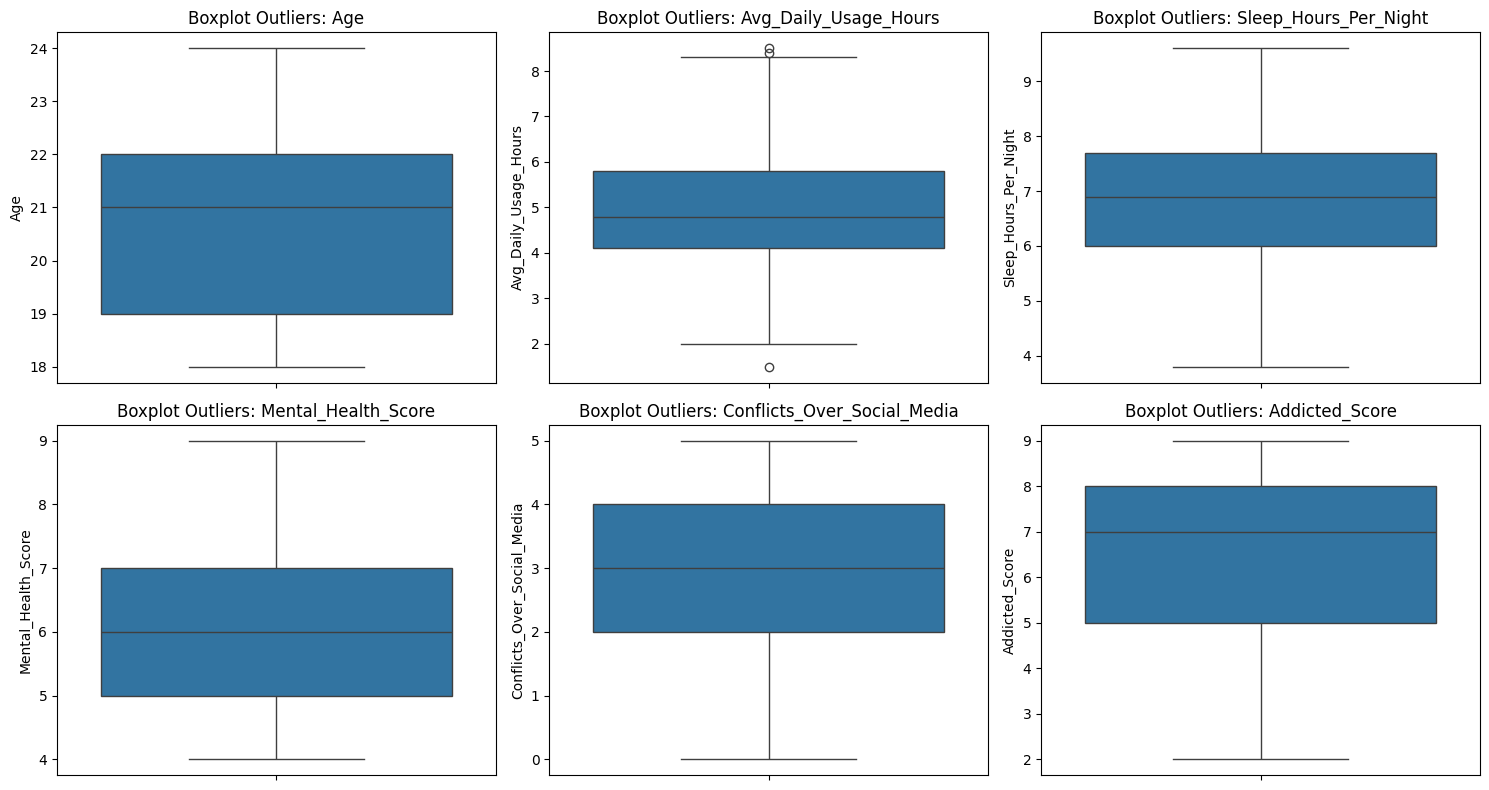

In [280]:
# Potentiella outliers i numeriska kolumner
plt.figure(figsize=(15, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df, y=column)
    plt.title(f"Boxplot Outliers: {column}")
plt.tight_layout()
plt.show()

##### 📝 I vår generella överblick ser vi att datasetet ser ganska städat ut: 
- **`Addicted_Score`** är vår beroende variabel **`y`** - och vi vill undersöka hur de oberoende variablerna **`X`** korrelerar och påverkar *`y`*.

- Det finns *inga* null-värden.
- `Student_ID` är unik identifierare för varje respondent - och säkerställer att inga duplikat finns. Jag kommer välja att utföra `.drop()` på denna kolumn under min Exploratory Data Analysis eftersom den inte tillför något värde för analysen.
- De 6 kolumnerna med *`object`*-datatyp verkar, vid första anblick, ha en rimlig mängd olika värden för respektive kolumn.
- Dessa kolumner kommer vi behöva ta ställning till huruvida *`one-hot-encoding`* eller *`dummy-variable-encoding`* bör användas. Eftersom jag främst kommer att använda Linjära Regressionsmodeller är **`dummy-variable-encoding`** det nödvändiga valet. 
- Däremot behöver ett ställningstagande göras angående `Country`, där 110 olika kategoriska värden inte är rimligt för `dummy-variable-encoding`. För tillfället planerar jag att uföra en `.drop()` inför träning av Maskin-Inlärnings-modeller.
- Ingen av kolumnerna med kategorisk data innehar en tydlig rangordning - därav behövs inte någon *`ordinal-encoding`* utföras.

---

Genom att leta fram rekommenderat antal sömntimmar för olika åldersgrupper kan vi sätta kolumnen `Sleep_Hours_Per_Night` i perspektiv till vad som rekommenderas. Vi kan bygga vidare på detta genom att föra in dessa rekommendationer i en egna kolumner där varje rad/rekommendation kopplas till repsondentens ålder för jämförelser.

https://www.sleephealthjournal.org/article/s2352-7218(15)00015-7/fulltext

#### 💤 National Sleep Foundation Recommendations:

| Age Group                | Recommended (h) | May be appropriate (h) | Not recommended (h)        |
|--------------------------|-----------------|------------------------|----------------------------|
| ...                      |                 |                        |                            |
| **Teenagers (14-17 y)**  | 8 to 10         | 7, 11                  | Less than 7, More than 11  |
| **Young adults (18-25 y)**| 7 to 9         | 6, 10 to 11            | Less than 6, More than 11  |
| **Adults (26-64 y)**     | 7 to 9          | 6, 10                  | Less than 6, More than 10  |
| ...                      |                 |                        |                            |

---

#### 📢 Begränsningar:
- Alla mätningar i datan är självrapporterade och självskattade av varje enskild person. Brist på självinsikt och beroendebild kan bidra till icke sanningsenliga svar.

- Respondenterna skulle även kunna vara påverkade av social önskvärdhetsbias genom att de känner sig pressade att förneka beroendeproblematik, eller rationalisera den.



---

#### 📍Förståelse för varje kolumn och vad den representerar:

*``Student_ID:``* Unik för varje student - vilket säkerställer att inga duplikat finns.

*``Age:``* Ålder mellan 16-26 år.

*``Gender:``* Kategorisk kolumn med värdena *Male* eller *Female*.

*``Academic_Level:``* Kategorisk kolumn med personens högsta aktuella akademiska nivå (gäller även pågående).

*``Country:``* Landet personen bor i vid svarstillfället.

*``Avg_Daily_Usage_Hours:``* Det genomsnittliga antal timmar per dag personen spenderar på sociala medie-plattformar.

*``Most_Used_Platform:``* Kategorisk kolumn som innehåller värdet med den sociala medie-plattform personen mest frekvent använder.

*``Affects_Academic_Performance:``* Kategorisk kolumn med värdena *Yes* och *No* baserat på frågan *..whether the student perceives their social media use as having a negative impact on their academic performance*.

Self-reported impace on academics. Answers question .

*``Sleep_Hours_Per_Night:``* Det genomsnittliga antalet timmar som personen sover per natt.

*``Mental_Health_Score:``* Skala mellan 1 (Dålig) till 10 (Mycket bra) där personen självskattar sin generella psykiska hälsa.

Self-rated mental health score of the respondent.

*``Relationship_Status:``* Kategorisk kolumn som innehåller *Single*, *In Relationship* och *Complicated*

*``Conflicts_Over_Social_Media:``* Antal konflikter/meningsskiljaktigheter med familj, vänner eller partner över personens sociala medie-vanor.

*``Addicted_Score:``* Standardiserad skala ``(1 = Låg till 10 = Hög)`` baserat på *Bergen Social Media Addiction Scale*.


---

### ✂️ Bearbetning av datan

In [311]:
df = df.drop(columns=['Student_ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 66.2+ KB


---

### 📊 EDA - Data & Distribution

Gender
Female    353
Male      352
Name: count, dtype: int64


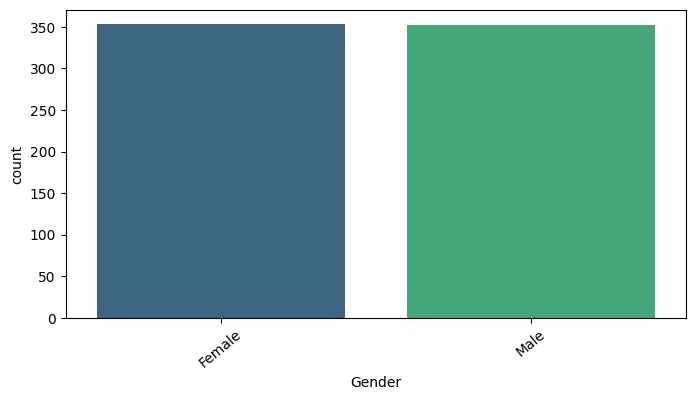

Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


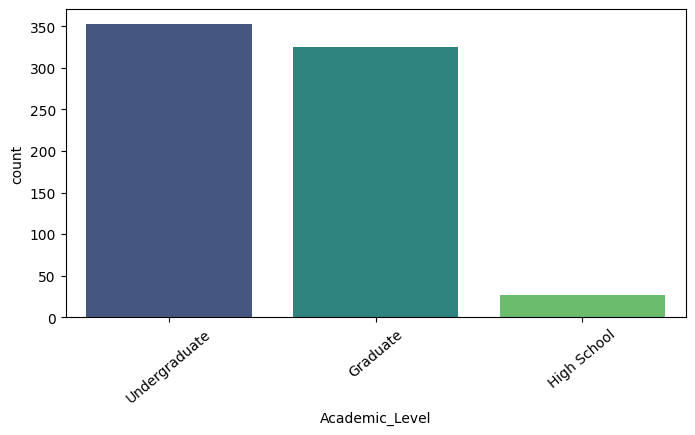

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64


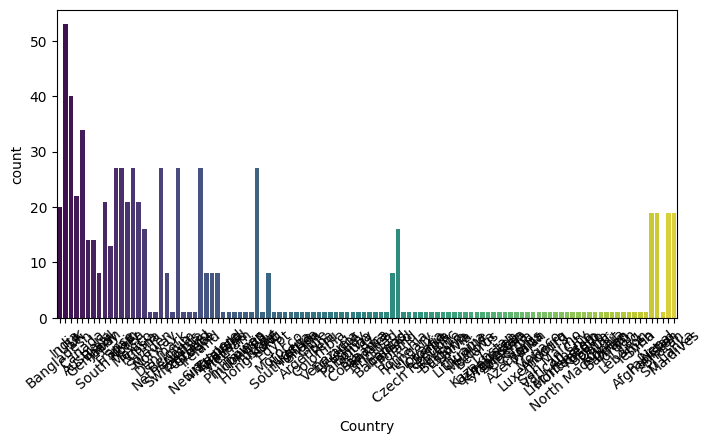

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


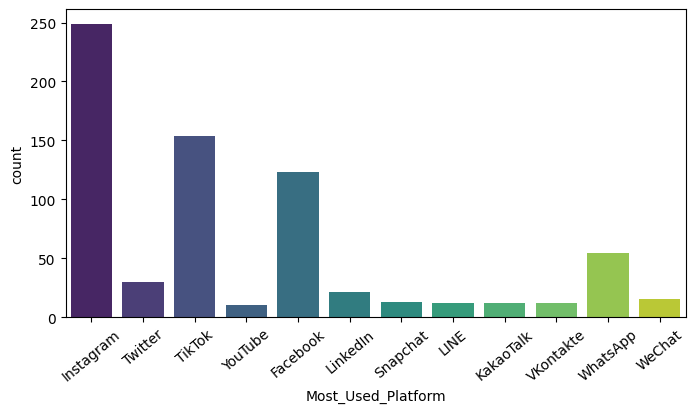

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64


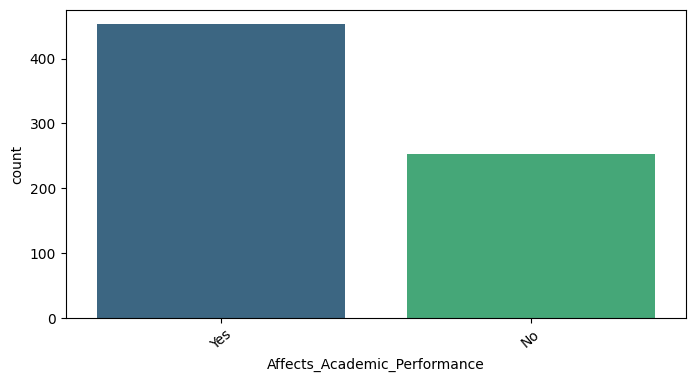

Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


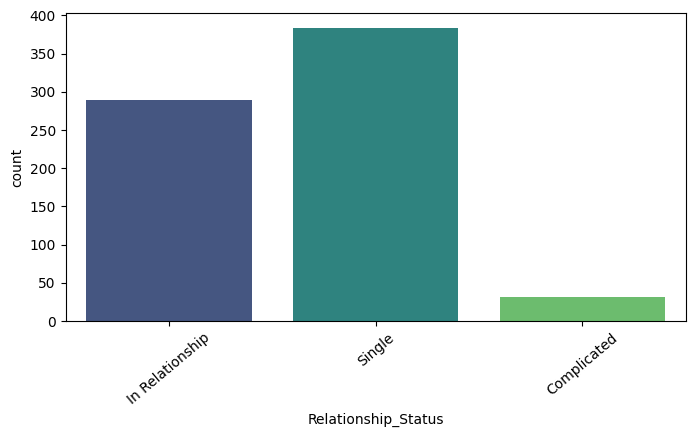

In [54]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(df[column].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(df, x=column, palette="viridis", hue=column)
    plt.xticks(rotation=40)
    
    plt.show()

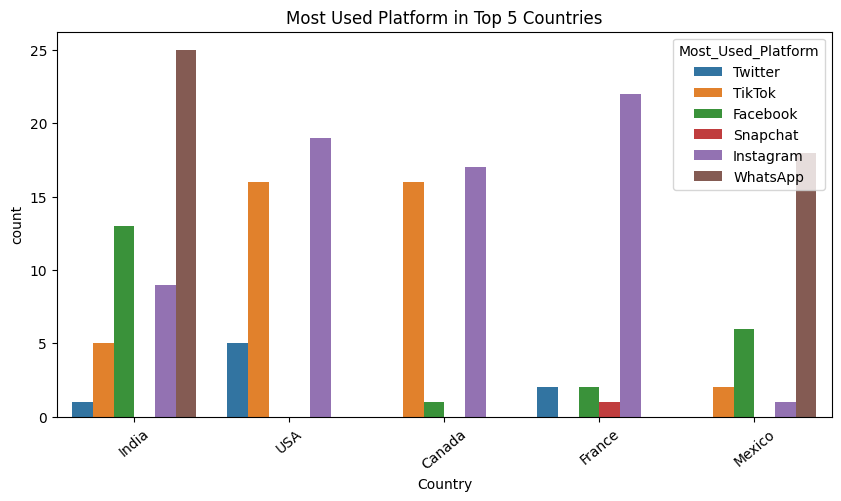

In [ ]:
top_countries = df['Country'].value_counts().nlargest(5).index

plt.figure(figsize=(10, 5))
sns.countplot(
  df[df['Country'].isin(top_countries)],
  x='Country',
  hue='Most_Used_Platform')
plt.title("Most Used Platform in Top 5 Countries")
plt.xticks(rotation=40)

plt.show()

Most_Used_Platform
WhatsApp     7.462963
Snapchat     7.461538
TikTok       7.428571
Instagram    6.554217
YouTube      6.100000
WeChat       6.066667
KakaoTalk    6.000000
Facebook     5.666667
Twitter      5.500000
VKontakte    5.000000
LinkedIn     3.809524
LINE         3.000000
Name: Addicted_Score, dtype: float64


C:\Users\david\AppData\Local\Temp\ipykernel_23976\1558275003.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_addicted.index, y=platform_addicted.values, palette="viridis")


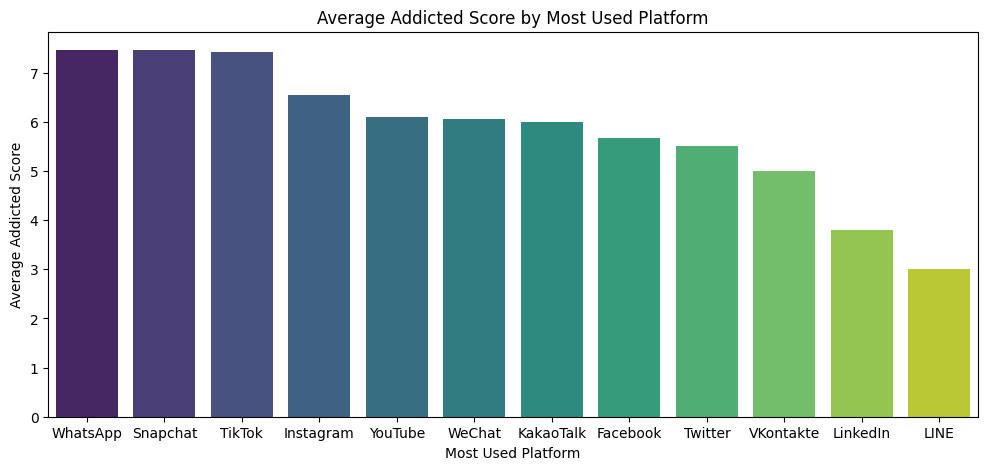

In [66]:
# Vilken plattform har högst genomsnittligt addicted_score?
platform_addicted = df.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False)
print(platform_addicted)

# Visualisering 
plt.figure(figsize=(12, 5))

sns.barplot(x=platform_addicted.index, y=platform_addicted.values, palette="viridis")
plt.xlabel("Most Used Platform")
plt.ylabel("Average Addicted Score")
plt.title("Average Addicted Score by Most Used Platform")

plt.show()

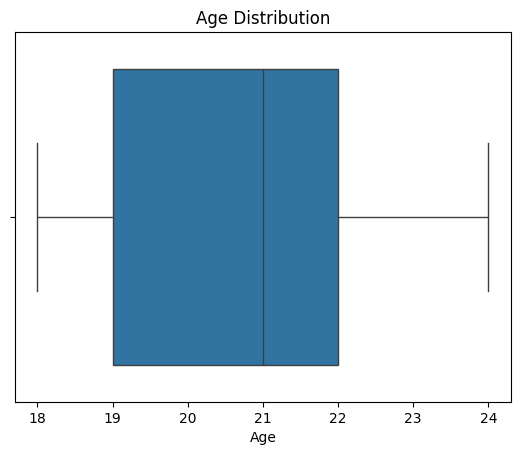

In [21]:
#Åldersdistribution:
sns.boxplot(
  df, 
  x="Age")
plt.title('Age Distribution')

plt.show()

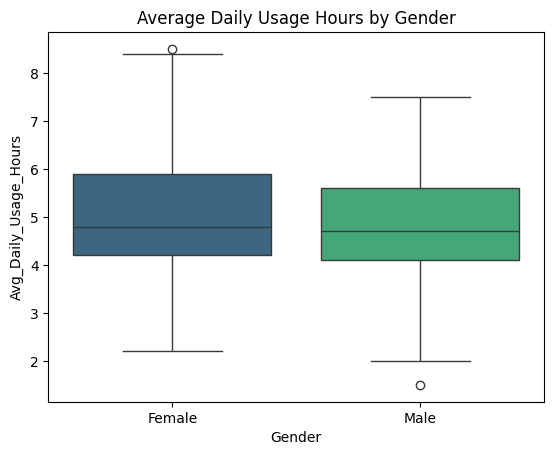

In [235]:
# Genomsnittlig daglig användning av Sociala Medier mellan kön:
sns.boxplot(
  df, 
  x="Gender", 
  y="Avg_Daily_Usage_Hours", 
  palette="viridis", 
  hue="Gender")
plt.title('Average Daily Usage Hours by Gender')

plt.show()

In [ ]:
print("Pivot: Fördelning av 'Affects_Academic_Performance' per 'Academic_Level':")
df.pivot_table(index='Academic_Level', columns='Relationship_Status', values='Student_ID', aggfunc='count')

Pivot: Fördelning av 'Affects_Academic_Performance' per 'Academic_Level':


Relationship_Status,Complicated,In Relationship,Single
Academic_Level,,,
Graduate,5,163,157
High School,9,6,12
Undergraduate,18,120,215


In [ ]:
print("Pivot: Fördelning av 'Affects_Academic_Performance' per 'Academic_Level':")
df.pivot_table(index='Academic_Level', columns='Affects_Academic_Performance', values='Student_ID', aggfunc='count')

Pivot: Fördelning av 'Affects_Academic_Performance' per 'Academic_Level':


Affects_Academic_Performance,No,Yes
Academic_Level,,
Graduate,126,199
High School,2,25
Undergraduate,124,229


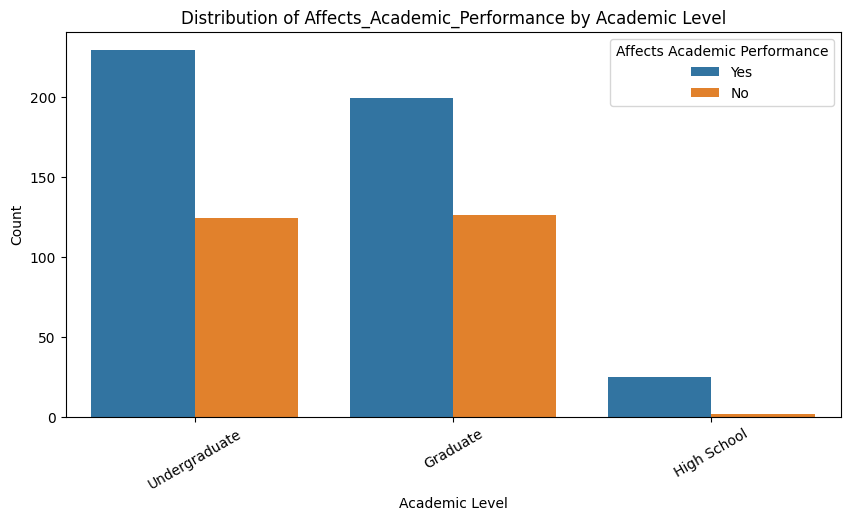

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(df, x='Academic_Level', hue='Affects_Academic_Performance')
plt.title('Distribution of Affects_Academic_Performance by Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Affects Academic Performance')

plt.show()


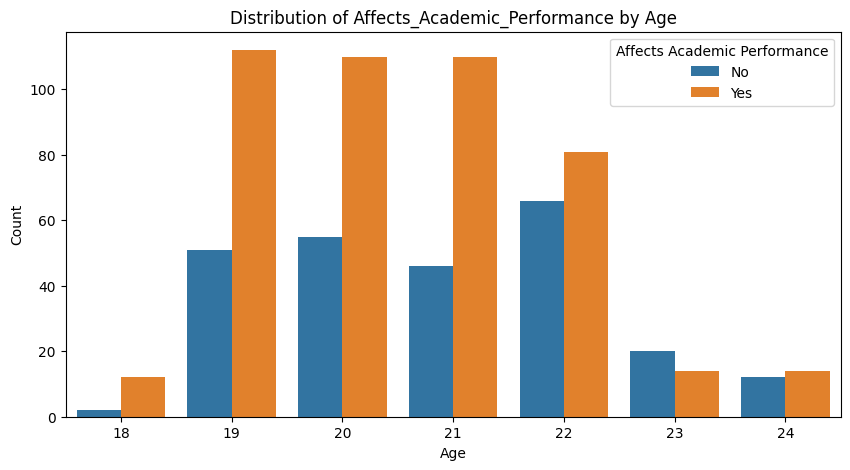

In [154]:
plt.figure(figsize=(10, 5))

sns.countplot(df, x='Age', hue='Affects_Academic_Performance')
plt.title('Distribution of Affects_Academic_Performance by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Affects Academic Performance')

plt.show()


In [5]:
# Titta närmre rent procentuellt för hur Yes/No ser ut för olika åldrar
df.groupby('Age')['Affects_Academic_Performance'].value_counts(normalize=True).unstack(fill_value=0) * 100

Affects_Academic_Performance,No,Yes
Age,,
18,14.285714,85.714286
19,31.288344,68.711656
20,33.333333,66.666667
21,29.487179,70.512821
22,44.897959,55.102041
23,58.823529,41.176471
24,46.153846,53.846154


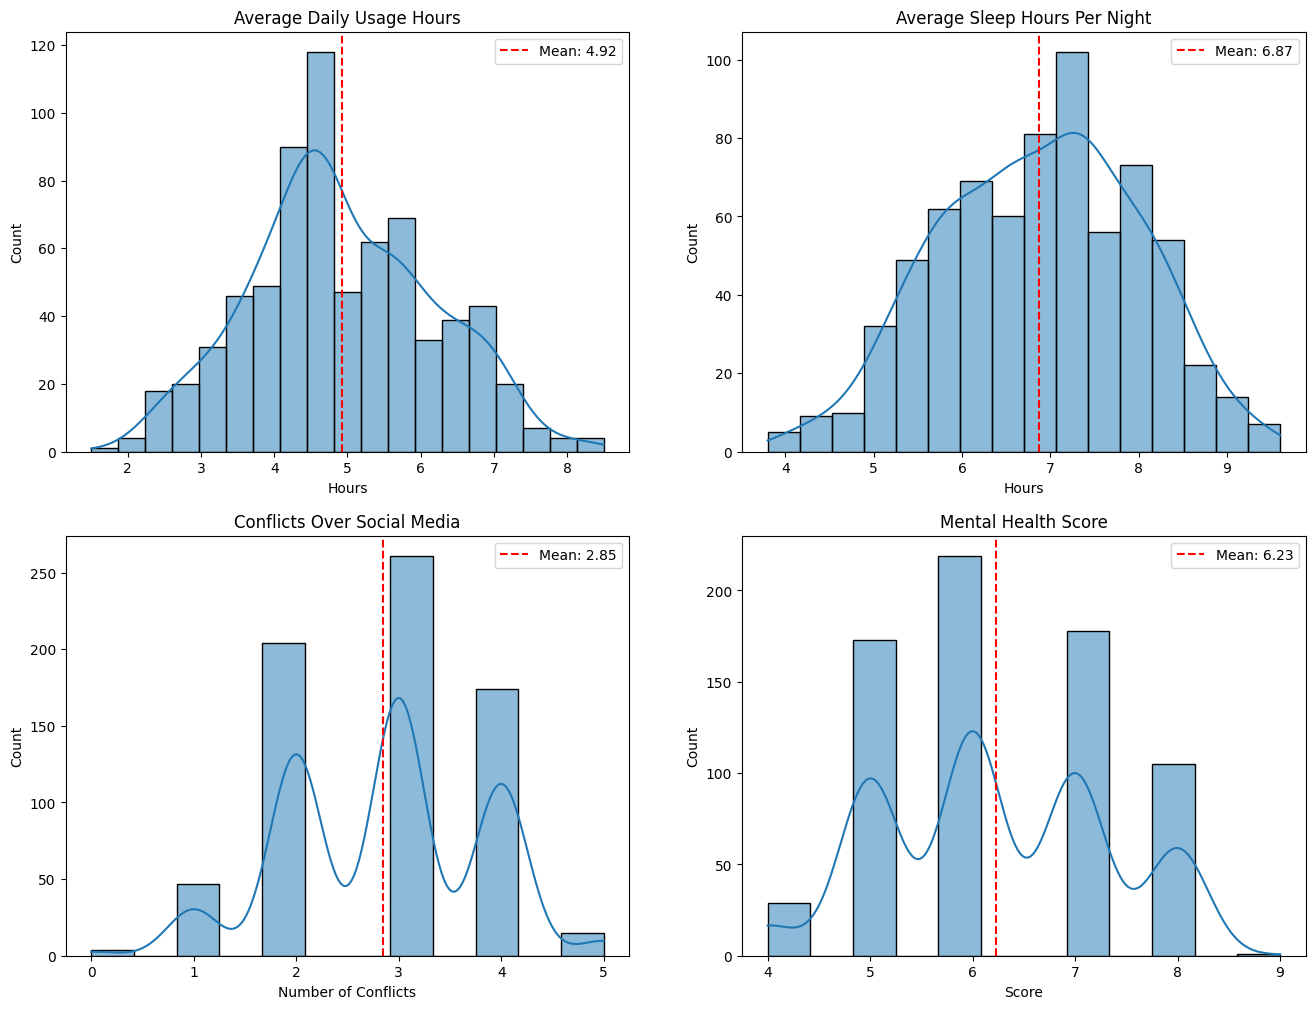

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1
sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Average Daily Usage Hours')
axes[0, 0].set_xlabel('Hours')
axes[0, 0].axvline(df['Avg_Daily_Usage_Hours'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Avg_Daily_Usage_Hours'].mean():.2f}")
axes[0, 0].legend()

# Plot 2
sns.histplot(df['Sleep_Hours_Per_Night'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Average Sleep Hours Per Night')
axes[0, 1].set_xlabel('Hours')
axes[0, 1].axvline(df['Sleep_Hours_Per_Night'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Sleep_Hours_Per_Night'].mean():.2f}")
axes[0, 1].legend()

# Plot 3
sns.histplot(df['Conflicts_Over_Social_Media'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Conflicts Over Social Media')
axes[1, 0].set_xlabel('Number of Conflicts')
axes[1, 0].axvline(df['Conflicts_Over_Social_Media'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Conflicts_Over_Social_Media'].mean():.2f}")
axes[1, 0].legend()

# Plot 4
sns.histplot(df['Mental_Health_Score'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Mental Health Score')
axes[1, 1].set_xlabel('Score')
axes[1, 1].axvline(df['Mental_Health_Score'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Mental_Health_Score'].mean():.2f}")
axes[1, 1].legend()

plt.show()

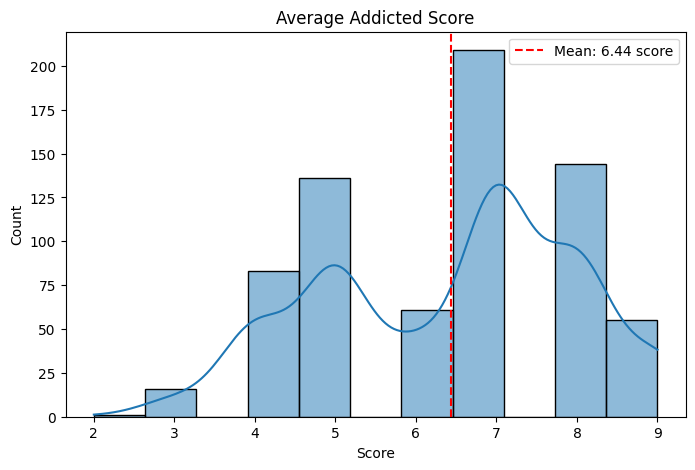

In [237]:
plt.figure(figsize=(8, 5))

sns.histplot(df['Addicted_Score'], kde=True)
plt.xlabel('Score')
plt.title('Average Addicted Score')
plt.axvline(df['Addicted_Score'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Addicted_Score'].mean():.2f} score")
plt.legend()

plt.show()

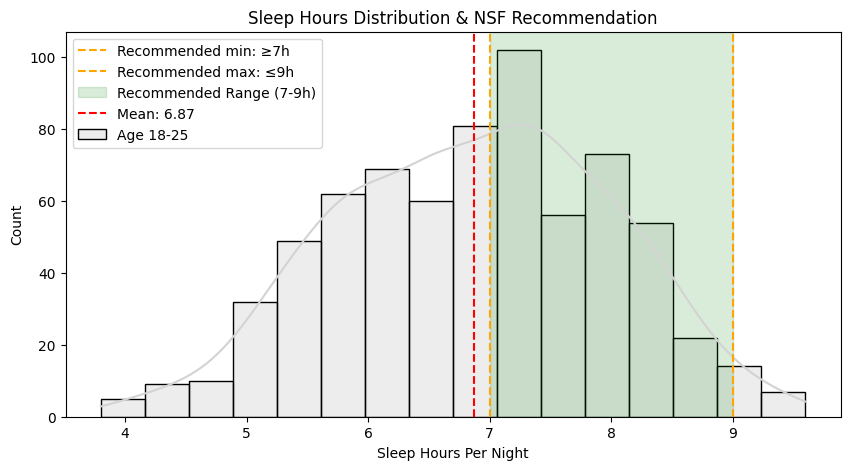

In [27]:
# Visualisering av rekommendation för Sleep_Hours_Per_Night (Baserad på National Sleep Foundation)
plt.figure(figsize=(10, 5))

sns.histplot(
    df[(df['Age'] >= 18) & (df['Age'] <= 25)]['Sleep_Hours_Per_Night'],
    color='lightgrey', label='Age 18-25', kde=True, alpha=0.4
)
plt.axvline(7, color='orange', linestyle='dashed', label='Recommended min: ≥7h')
plt.axvline(9, color='orange', linestyle='dashed', label='Recommended max: ≤9h')

plt.axvspan(7, 9, color='green', alpha=0.15, label='Recommended Range (7-9h)')

plt.axvline(df['Sleep_Hours_Per_Night'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Sleep_Hours_Per_Night'].mean():.2f}")

plt.xlabel('Sleep Hours Per Night')
plt.title('Sleep Hours Distribution & NSF Recommendation')
plt.legend()

plt.show()

#### 🔎 Observationer utifrån visualisering & distribution:

- 🙋‍♀️🙋‍♂️ Könsfördelningen är nästan helt jämn i datasetet.

- 👩‍🎓👨‍🎓 De flesta respondenterna är *Undergraduate* eller *Graduate* - medan *High School* är underrepresenterad. Detta speglar också åldersfördelningen i datasetet.
- 📱 Instagram är den överlägset mest populära plattformen hos respondenterna. Följt av TikTok, Facebook, WhatsApp och Twitter osv.
- 📈 En stor andel av studenterna anser att deras Sociala Medie-vanor påverkar deras akademiska resultat.
- 👬👭👫 Relationsstatusen som var mest frekvent hos respondenterna var *Single*.
- 📆 Vi ser ``ett åldersspann mellan 18 och 24 år``.
- Medelåldern ligger på **``21 år``**.
- 🙋‍♀️ Fördelningen av daglig användning mellan könen är tämligen likvärdig, men visar sig vara lite större hos kvinnor.
- Tittar vi på distributionen mellan `Affects_Academic_Perforance` och `Age` eller `Academic_Level` ser vi att *85.7%* av 18-åringar upplever att deras sociala mediavanor påverkar deras studieresultat negativt. Vidare ser vi att minskar i samband med åldersökning.






#### 🔎 Inferenser utifrån visualisering & distribution:

- 🙋‍♀️🙋‍♂️ En jämn könsfördelning minskar risken för bias kön i analysen.
- 👩‍🎓👨‍🎓 Högst påverkan på studieresultat hittar vi hos *18-21*-åringar. Dessa åldrar befinner sig i High School/Undergraduate i `Academic_Level`. 
  - Vi kan teoretisera kring hur `Academic_Level` blir svårare och mer krävande ju högre studie-nivå som nås. I det lägre, enklare skiktet, kanske elever inte tar skolan på så stort allvar, och är i vissa fall understimulerade vilket ger utrymme för sociala medievanor att gro och påverka. 
- 👬👭👫Den höga andelen singlar kan spegla åldersgruppen - men skulle även kunna relateras till sociala mediers roll i relationer och socialt liv.
  - Det är svårt att undersöka detta vidare med den befintliga datan, därför stannar det vid hypotes-stadiet.
- 🗺️ *Indien*, *USA*, *Canada* är i toppen av länderna som representeras. Resursrika länder som dessa, där teknik är lättilgänglig för gemene man, skapar förutsättningar för att man också utsätts för mer/tyngre bruk av sociala medier - och i sin tur dess eventuella konsekvenser.
- 🧮 *Medelvärdet* för `Avg_Daily_Usage_Hours` är **4.92 Timmar/Dag** vilket indikerar att sociala medier utgör en stor del av studenters dagliga vanor. 
  - Vidare kan detta möjligen korrelera med den stora andelen som känner påverkan på sina akademiska resultat då nästan 5h/dag av potentiell studietid går förlorad.
  - Datasetet belyser en generation och population med hög risk att utveckla problematiska- vanor och/eller beroende av sociala medier. 
- 🛌 Samtidigt är *medelvärdet* för `Sleep_Hours_Per_Night` **6.87** vilket visar på ett relativt högt antal sömntimmar.
- 💢 *Medelvärdet* för `Conflicts_Over_Social_Media` är *2.85**. Detta tyder på att social friktion är ganska vanligt förekommande för studenterna.
- ⚠️ `Addicted_Score` är, *likt resterande kolumner med skalor*, mellan *1 - 10*. Ett *medelvärde* på **6.44** kan tyda på en konsekvens av ovanstående observationer.
  - Trots att studien är självskattad, är det lite förvånande för mig hur respondenterna har självinsikt nog i sitt eventuella beroende att skatta sig generellt högt i skalan.
  - Ett högt medelvärde stärker bilden av att sociala medier är en central, och ibland problematisk del av yngre personers liv.
- 📱 *Instagram* och *TikToks* överlägsna popularitet skulle kunna bero på deras *Reel*-format som är konstruerat för *instant gratification* och dopamin-påslag som fångar användaren i ett oändligt scrollande.

- 🧮 Vidare bör korrelationer utforskas:
  - 📈 Hög `Avg_Daily_Usage_Hours` korrelerar förmodligen med hög `Addicted_Score`.
  - 📉 Låg `Sleep_Hours_Per_Night` samt `Mental_Health_Score` kan också tänkas korrelera med en hög `Addicted_Score`.
  - ❔ Kan en begränsad mängd konsumption/användning av Social Media bidra till en mer positiv `Mental_Health_Score`?
  - 🛌 Medelvärdet för antal sömntimmar visade sig vara relativt hög, kanske sociala medie-vanor tar mer respondenternas dag-/studietid snarare än potentiell sömn?
  - 💢 Medelvärdet för `Conflicts_Over_Social_Media` väcker frågan om denna friktion vidare påverkar relationer och `Mental_Health_Score`.

---

### 📑 Korrelationer


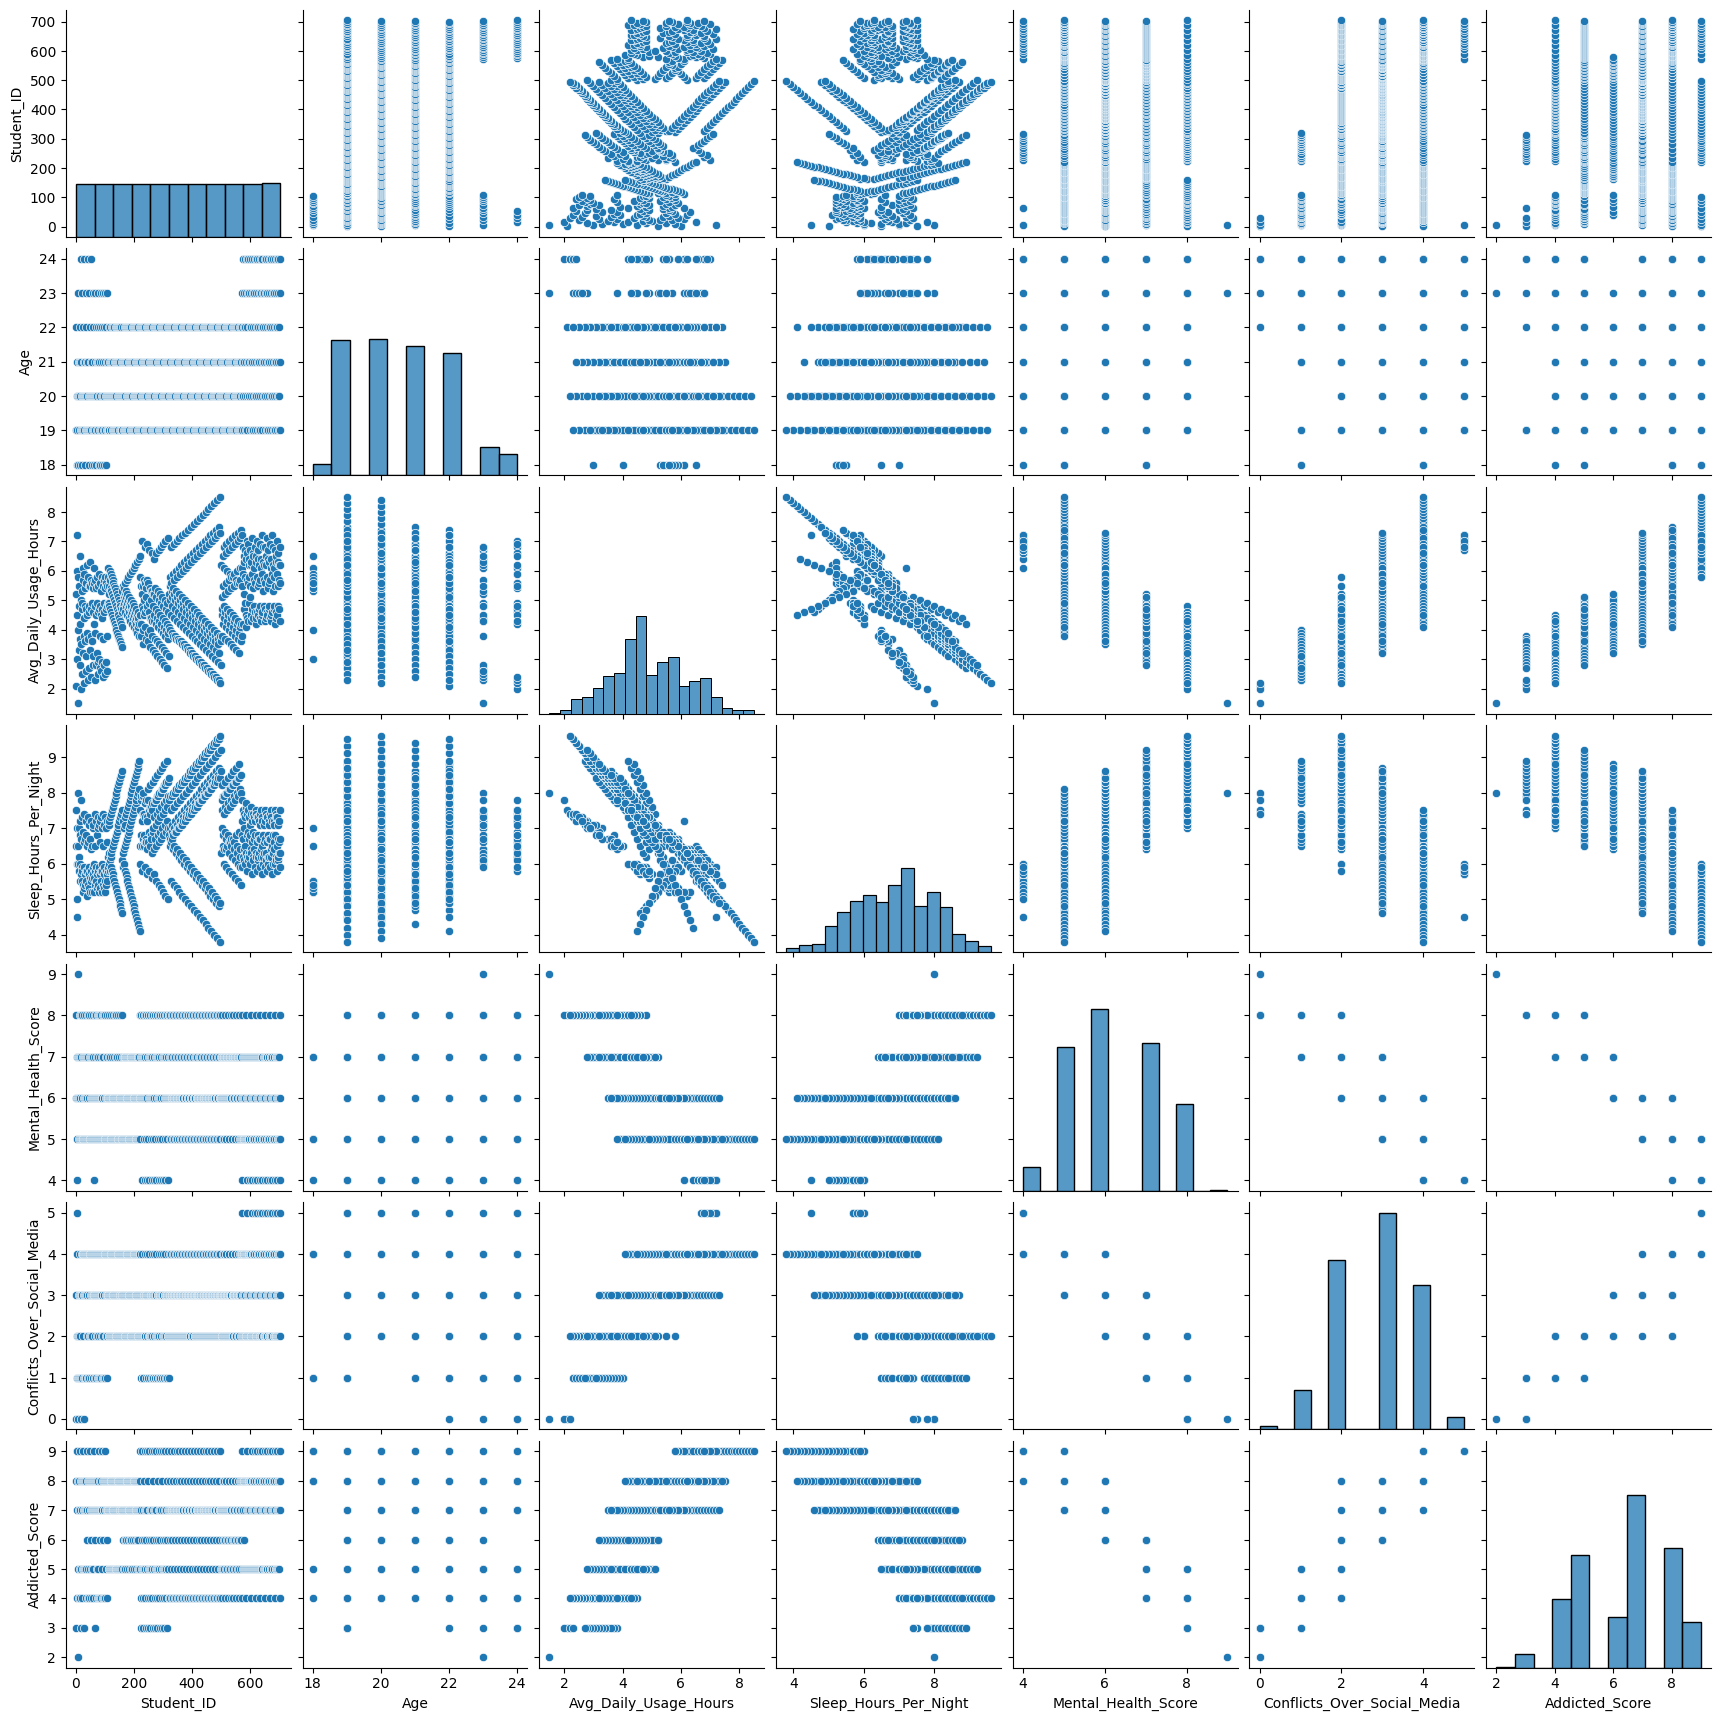

In [ ]:
# Stor paiplot för att blicka över eventuella samband
sns.pairplot(df)
plt.show()


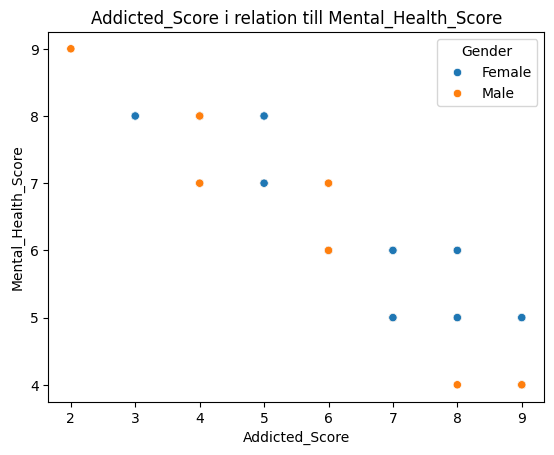

In [ ]:
# Korrelation mellan Addicted_Score och Mental_Health_Score
sns.scatterplot(
  df,
  x="Addicted_Score",
  y="Mental_Health_Score",
  hue="Gender"
)

plt.title("Addicted_Score i relation till Mental_Health_Score")
plt.xlabel("Addicted_Score")
plt.ylabel("Mental_Health_Score")

plt.show()

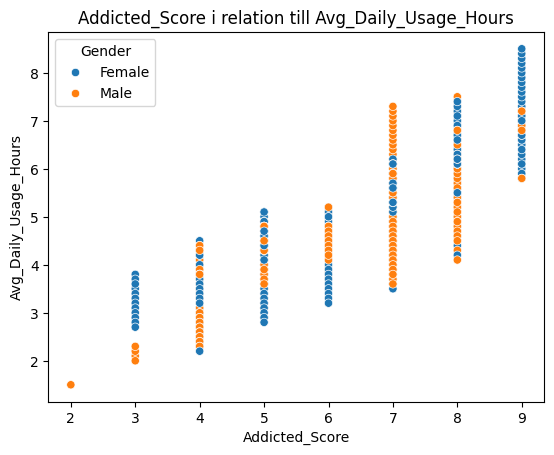

In [240]:
#Korrelation mellan Addicted_Score och Avg_Daily_Usage_Hours
sns.scatterplot(
  data=df,
  x="Addicted_Score",
  y="Avg_Daily_Usage_Hours",
  hue="Gender"
)

plt.title("Addicted_Score i relation till Avg_Daily_Usage_Hours")
plt.xlabel("Addicted_Score")
plt.ylabel("Avg_Daily_Usage_Hours")

plt.show()

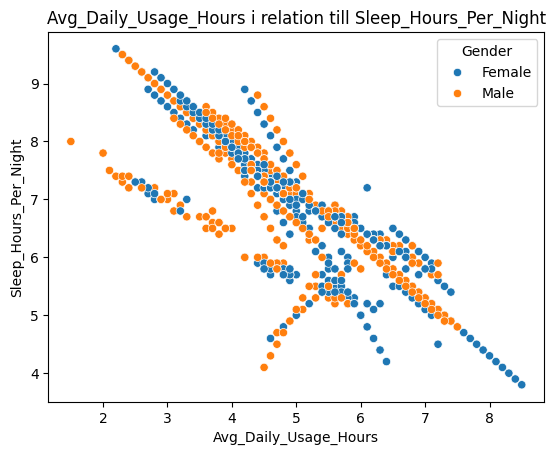

In [241]:
 #Korrelation mellan Avg_Daily_Usage_Hours och Sleep_Hours_Per_Night
sns.scatterplot(
  data=df,
  x="Avg_Daily_Usage_Hours",
  y="Sleep_Hours_Per_Night",
  hue="Gender"
)
plt.title("Avg_Daily_Usage_Hours i relation till Sleep_Hours_Per_Night")
plt.xlabel("Avg_Daily_Usage_Hours")
plt.ylabel("Sleep_Hours_Per_Night")

plt.show()

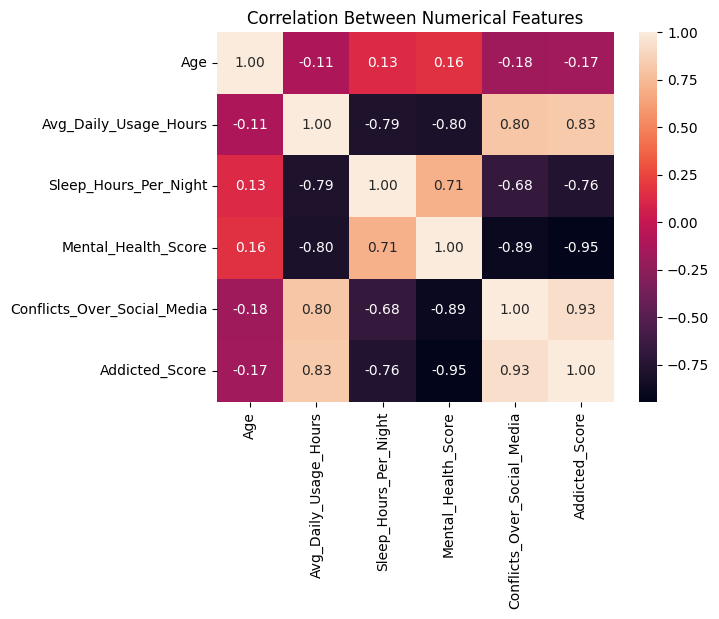

In [ ]:
# Korrelation mellan numeriska kolumner:
correlation = numeric_columns.corr()

sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Between Numerical Features")

plt.show()

---

##### 📦Importera Bibliotek för Maskininlärning:

In [97]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import root_mean_squared_error, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import StandardScaler

import joblib

### ✂️ Bearbetning av datan inför modellträning

In [ ]:
df = pd.read_csv("./Students_Social_Media_Addiction.csv")

# Preprocessering Random Forest Classifier
df_class = df.copy()

# .drop() av onödiga kolumner (Student_ID, Country, Most_Used_Platform, Academic_Level) inför träning av modell
df_class = df_class.drop(columns=['Student_ID', 'Country', 'Most_Used_Platform', 'Academic_Level', 'Gender'], axis=1)

# Binning för kategorisering av Addicted_Score
bins = [1, 4.5, 7.8, 10] # Efter skaltransformation är 7.8 cut-off mellan Medium och High
labels = ['Low', 'Medium', 'High']
df_class['Addicted_Grade'] = pd.cut(
  df_class['Addicted_Score'], 
  bins=bins, 
  labels=labels, 
  include_lowest=True)

# Ordinal-encoding av Addicted_Score (y) för Klassificeringsmodell
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_class['Addicted_Grade'] = df_class['Addicted_Grade'].map(mapping)

# One-hot-encoding av kategoriska kolumner, exklusive y, för Klassificeringsmodell
df_class_xfeatures = df_class.drop(columns=['Addicted_Score', 'Addicted_Grade'])
df_class_xfeatures = pd.get_dummies(df_class_xfeatures, dtype=int)

In [93]:
df_class_xfeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Avg_Daily_Usage_Hours                705 non-null    float64
 1   Sleep_Hours_Per_Night                705 non-null    float64
 2   Mental_Health_Score                  705 non-null    int64  
 3   Conflicts_Over_Social_Media          705 non-null    int64  
 4   Affects_Academic_Performance_No      705 non-null    int64  
 5   Affects_Academic_Performance_Yes     705 non-null    int64  
 6   Relationship_Status_Complicated      705 non-null    int64  
 7   Relationship_Status_In Relationship  705 non-null    int64  
 8   Relationship_Status_Single           705 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


In [94]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Avg_Daily_Usage_Hours         705 non-null    float64 
 1   Affects_Academic_Performance  705 non-null    object  
 2   Sleep_Hours_Per_Night         705 non-null    float64 
 3   Mental_Health_Score           705 non-null    int64   
 4   Relationship_Status           705 non-null    object  
 5   Conflicts_Over_Social_Media   705 non-null    int64   
 6   Addicted_Score                705 non-null    int64   
 7   Addicted_Grade                705 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 39.5+ KB


---

### 🧮 Maskininlärning:


SVC - Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       0.98      0.98      0.98        81
           3       1.00      1.00      1.00        40

    accuracy                           0.97       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.97      0.97      0.97       141



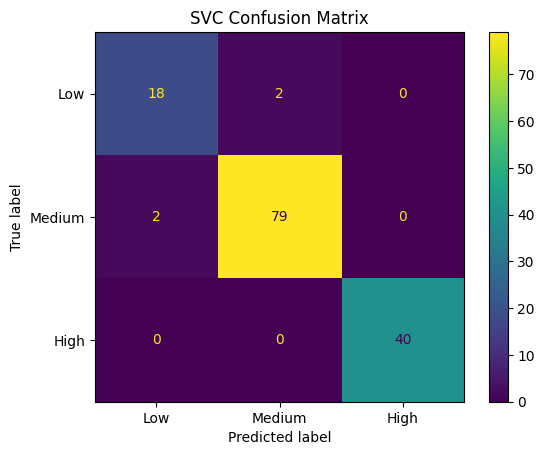


Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       0.98      0.98      0.98        81
           3       1.00      1.00      1.00        40

    accuracy                           0.97       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.97      0.97      0.97       141



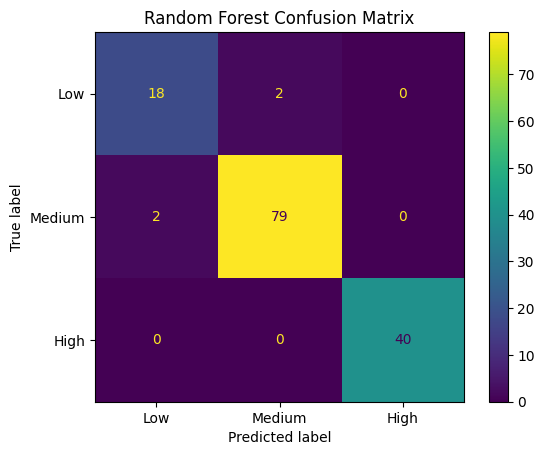

In [ ]:
# Features och målvariabel
X = df_class_xfeatures
y = df_class['Addicted_Grade']

# Train-test-split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svc = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Stratifiering för att bibehålla balans i klass-distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scaler = StandardScaler()

#----------------------------------------------------------------------------------------------------------#
# SVC pipeline och parametergrid
model_svc = make_pipeline(
    scaler, svc
    )

svc_hyperparam_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'poly']
}
model_svc_grid_search = GridSearchCV(model_svc, svc_hyperparam_grid, cv=skf, n_jobs=-1)


# RandomForest pipeline och parametergrid
model_rf = make_pipeline(
    rf
)

rf_hyperparam_grid = {
    'randomforestclassifier__n_estimators': [50, 100],
    'randomforestclassifier__max_depth': [None, 5, 10]
}
model_rf_grid_search = GridSearchCV(model_rf, rf_hyperparam_grid, cv=skf, n_jobs=-1)
#----------------------------------------------------------------------------------------------------------#

# K-delad korsvalidering med GridSearchCV
results_svc = cross_validate(model_svc_grid_search, X_train, y_train, cv=skf, return_estimator=True, scoring='accuracy')
results_rf = cross_validate(model_rf_grid_search, X_train, y_train, cv=skf, return_estimator=True, scoring='accuracy')

# Utvärdera bästa estimatorn från sista folden
best_svc = results_svc['estimator'][-1]
best_rf = results_rf['estimator'][-1]

y_pred__svc = best_svc.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

print('\nSVC - Classification Report:')
print(classification_report(y_test, y_pred__svc))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred__svc, display_labels=['Low', 'Medium', 'High'])
plt.title('SVC Confusion Matrix')

plt.show()

print('\nRandom Forest - Classification Report:')
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Low', 'Medium', 'High'])
plt.title('Random Forest Confusion Matrix')

plt.show()


In [111]:
print("Best hyperparameters for SVC:", best_svc.best_params_)

Best hyperparameters for SVC: {'svc__C': 10, 'svc__kernel': 'linear'}


SVC mean CV accuracy: 0.971634
Random Forest mean CV accuracy: 0.971650
Random Forest is the best model based on cross-validation accuracy.

Best Model: Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       0.98      0.98      0.98        81
           3       1.00      1.00      1.00        40

    accuracy                           0.97       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.97      0.97      0.97       141



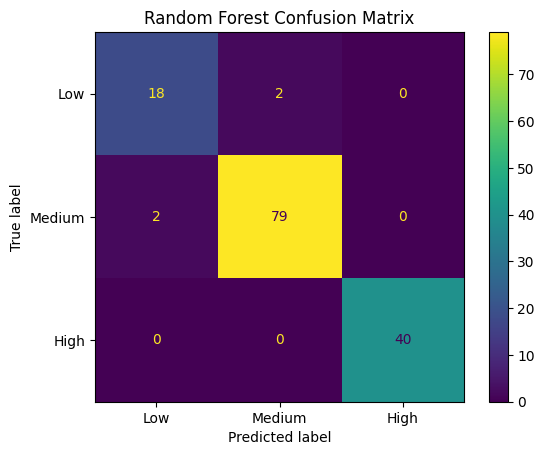

In [112]:
# Jämförelse av medelvärde av accuracy från cross-validation för att hitta bästa modellen
mean_acc_svc = results_svc['test_score'].mean()
mean_acc_rf = results_rf['test_score'].mean()

print(f"SVC mean CV accuracy: {mean_acc_svc:.6f}")
print(f"Random Forest mean CV accuracy: {mean_acc_rf:.6f}")

if mean_acc_svc > mean_acc_rf:
    print("SVC is the best model based on cross-validation accuracy.")
    best_model = best_svc
else:
    print("Random Forest is the best model based on cross-validation accuracy.")
    best_model = best_rf

# Använd bästa modellen för att göra prediktioner på hela datasetet
y_pred_best_model = best_model.predict(X_test)

print('\nBest Model: Random Forest - Classification Report:')
print(classification_report(y_test, y_pred_best_model))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_model, display_labels=['Low', 'Medium', 'High'])
plt.title('Random Forest Confusion Matrix')

plt.show()

---

In [70]:
# Träna om best_model på hela datasetet
best_model.fit(X, y)

# Spara modellen med joblib till .pkl-fil
joblib.dump(best_model, 'Social_Media_Addiction_Classifier.pkl')

print('Best model retrained and saved as Social_Media_Addiction_Classifier.pkl')


Best model retrained and saved as Social_Media_Addiction_Classifier2.pkl
